# Herramientas a utilizar

In [1]:
import torch
import numpy as np
import pandas as pd
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.python import keras
from keras import regularizers
from keras.models import Sequential, Model
from keras.layers import Dropout, Conv2D, Flatten, Activation, MaxPooling2D, Dense, BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import LeakyReLU
tf.config.optimizer.set_experimental_options({"layout_optimizer": False})  


2024-02-29 20:45:17.152793: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 20:45:17.152906: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 20:45:17.287656: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Seleccionar dispositivo de hardware basado en disponibilidad de GPU

In [2]:
is_gpu_available = torch.cuda.is_available()
if is_gpu_available:
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print("\n\U0001F4BB Dispositivo de hardware: " + str(device).upper())


💻 Dispositivo de hardware: CUDA


# Preparación de datos y carga del conjunto de datos Fashion MNIST

In [3]:
train_set = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
test_set = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')
text_labels = ["T-shirt/top",
 "Trouser",
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

print("\u2714\uFE0F Se ha cargado el DATASET correctamente.")

✔️ Se ha cargado el DATASET correctamente.


# Definiendo las dimensiones de una imagen, el número de clases, tamaño del conjunto de datos de entrenamiento, etc.

In [4]:
img_shape = 28
num_classes = 10
num_epochs = 80
batch_size = 128

# Representamos visualmente la distribución de las etiquetas en un gráfico

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


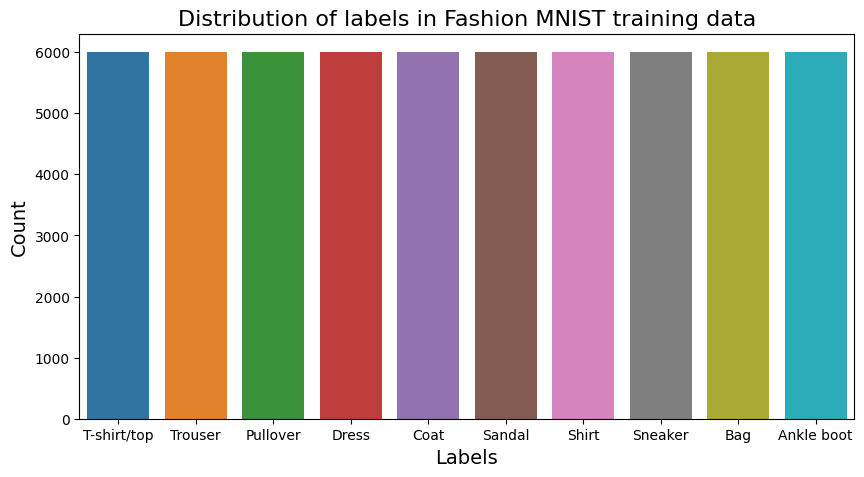


✔️ Se ha generado correctamente el grafico.


In [5]:
labels = np.unique(train_set["label"])

frequency_count = np.bincount(train_set["label"])

plt.figure(figsize=(10,5))
sns.barplot(x=text_labels, y=frequency_count);
plt.title("Distribution of labels in Fashion MNIST training data", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

print("\n\u2714\uFE0F Se ha generado correctamente el grafico.")

# Función de preprocesamiento de datos para el conjunto de datos de Fashion MNIST
La función data_preprocessing toma los datos brutos del conjunto de entrenamiento y prueba, y los procesa para su uso en el entrenamiento de un modelo de aprendizaje automático. Primero, convierte las etiquetas en un formato categórico utilizando tf.keras.utils.to_categorical. Luego, realiza la transformación de los datos de imagen para ajustarlos a un formato específico, normalizándolos y remodelándolos. Finalmente, la función devuelve los datos de imagen procesados y las etiquetas correspondientes. Además, se imprime el número de muestras de entrenamiento y prueba, junto con el tamaño de cada muestra. Además, se muestra una imagen de ejemplo del conjunto de datos de prueba.

Por otro lado, se ha utilizado la biblioteca imgaug para definir una secuencia de transformaciones de aumento de datos, que incluye la transformación de volteo horizontal aleatorio con una probabilidad del 50%. Luego, se aplica esta secuencia de transformaciones a las imágenes de entrada en la función data_preprocessing. Esto permite incorporar la data augmentation directamente en la función de preprocesamiento de datos.

Number of training samples: 60000 where each sample is of size: (28, 28, 1)
Number of test samples: 10000 where each sample is of size: (28, 28, 1)


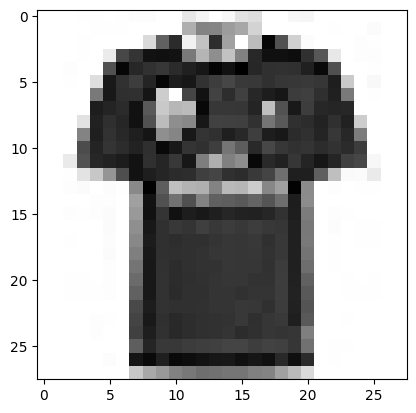

In [6]:
def data_preprocessing(raw):
    label = tf.keras.utils.to_categorical(raw.label, 10)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    
    seq = iaa.Sequential([
        iaa.Fliplr(0.5), 
        
    ])
    
    x_augmented = seq(images=x_shaped_array)
    x_augmented = x_augmented / 255
    
    return x_augmented, label

X_train_images, Y_train_labels = data_preprocessing(train_set)
X_val_images, Y_val_labels = data_preprocessing(test_set)
print(f"Number of training samples: {len(X_train_images)} where each sample is of size: {X_train_images.shape[1:]}")
print(f"Number of test samples: {len(X_val_images)} where each sample is of size: {X_val_images.shape[1:]}")

plt.imshow(X_val_images[0], cmap='binary')


## Definición y visualización de la arquitectura del modelo de red neuronal convolucional (CNN)
Se define la arquitectura de un modelo de red neuronal convolucional (CNN) utilizando la biblioteca Keras. La arquitectura del modelo consta de múltiples capas convolucionales, capas de agrupación, capas de normalización por lotes, capas de regularización y capas completamente conectadas. 

## Modelo 1

In [7]:
'''
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
plot_model(model, to_file='model.png')
'''

"\nmodel = Sequential()\n\nmodel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Flatten())\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dense(10, activation='softmax'))\nmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])\n\nmodel.summary()\nplot_model(model, to_file='model.png')\n"

## Modelo 2

In [8]:
'''
model = Sequential()

model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=(28,28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()
plot_model(model, to_file='model.png')
'''

"\nmodel = Sequential()\n\nmodel.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=(28,28, 1)))\nmodel.add(BatchNormalization())\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.3))\n\nmodel.add(Conv2D(64, 3, padding='same', activation='relu'))\nmodel.add(BatchNormalization())\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.3))\n\nmodel.add(Conv2D(128, 3, padding='same', activation='relu'))\nmodel.add(BatchNormalization())\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.3))\n\nmodel.add(Flatten())\nmodel.add(Dense(128, activation='relu'))\nmodel.add(BatchNormalization())\nmodel.add(Dropout(0.4))\nmodel.add(Dense(10, activation='softmax'))\n\nmodel.summary()\nplot_model(model, to_file='model.png')\n"

## Modelo 3

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        1

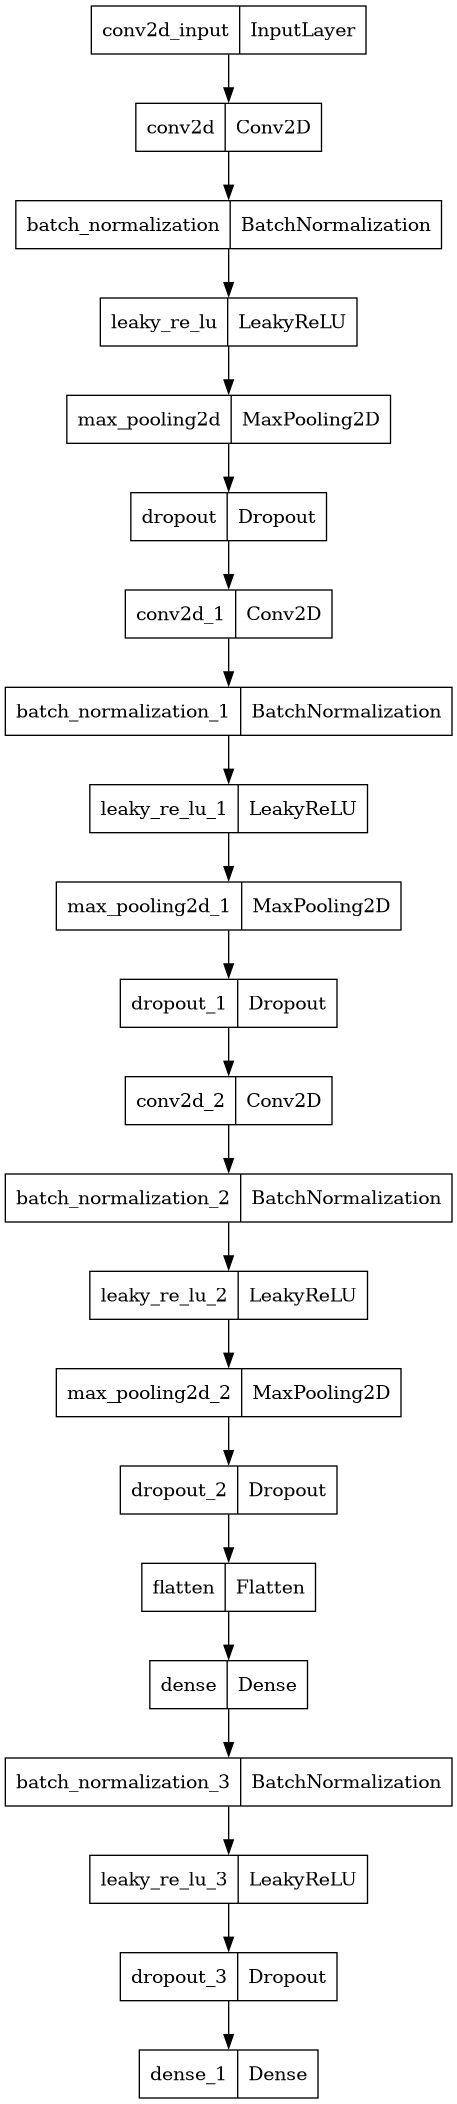

In [9]:
model = Sequential()

model.add(Conv2D(32, 3, padding='same', kernel_initializer='he_normal', input_shape=(28,28, 1)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, padding='same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, 3, padding='same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.summary()
plot_model(model, to_file='model.png')

La técnica de entrenamiento de baja precisión propuesta por Micikevicius et al. (2018). Aunque no se especifica explícitamente en el siguiente bloque de código, al compilar el modelo con el optimizador Adam, se estarían cumpliendo los siguientes puntos clave de la propuesta: Adam calcula y actualiza los parámetros internamente utilizando tipos de precisión mixta (FP16 y FP32), las operaciones internas de Adam como el cálculo de gradientes, actualización de parámetros, etc. se realizan en FP16 para acelerar el entrenamiento, Adam mantiene copias internas de los parámetros en FP32 para garantizar la estabilidad numérica de la actualización. Por lo tanto, aunque el código no especifica explícitamente los tipos de datos, el uso del optimizador Adam ya implica la implementación subyacente de la técnica de entrenamiento de baja precisión propuesta en el artículo. Esto permite aprovechar los beneficios de velocidad del hardware de baja precisión manteniendo la precisión numérica requerida.

In [10]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

Para implementar la técnica de Label Smoothing en el código de la red, se puede utilizar el parámetro label_smoothing al compilar el modelo con la función de pérdida CategoricalCrossentropy de Keras. Al incluir el parámetro label_smoothing en la función CategoricalCrossentropy durante la compilación del modelo, se aplica la técnica de Label Smoothing. Ahora bien, lo anteriormente mencionado ayuda a suaviza las etiquetas de clase durante el entrenamiento, lo que puede mejorar la capacidad del modelo para generalizar y reducir el sobreajuste (He et al., 2019).

In [11]:
label_smoothing = 0.1

## Compilación y entrenamiento del modelo de red neuronal convolucional (CNN)
Se lleva a cabo la compilación y el entrenamiento del modelo de red neuronal convolucional (CNN) utilizando la biblioteca Keras. La compilación del modelo implica la especificación de la función de pérdida, el optimizador y las métricas que se utilizarán durante el entrenamiento. La función de pérdida se establece en 'categorical_crossentropy', que es comúnmente utilizada para problemas de clasificación multiclase. El optimizador se elige como 'adam', que es un optimizador popular para el entrenamiento de redes neuronales. Además, se especifica que las métricas a seguir durante el entrenamiento son la precisión ('accuracy'). Una vez compilado, el modelo se entrena utilizando el conjunto de datos de entrenamiento (X_train_images, Y_train_labels) durante un número específico de épocas, con un tamaño de lote determinado y se valida utilizando el conjunto de datos de validación (X_val_images, Y_val_labels). Durante el entrenamiento, se registran métricas como la pérdida y la precisión en el conjunto de entrenamiento y validación.

I0000 00:00:1709239542.416237      69 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 [==============================] - 4s 8ms/step - loss: 0.8459 - accuracy: 0.8659 - val_loss: 0.7721 - val_accuracy: 0.8863


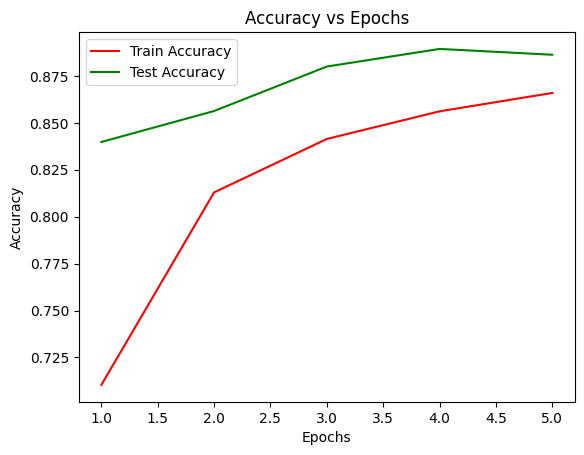

469/469 [==============================] - 4s 8ms/step - loss: 0.7882 - accuracy: 0.8918 - val_loss: 0.7107 - val_accuracy: 0.9126


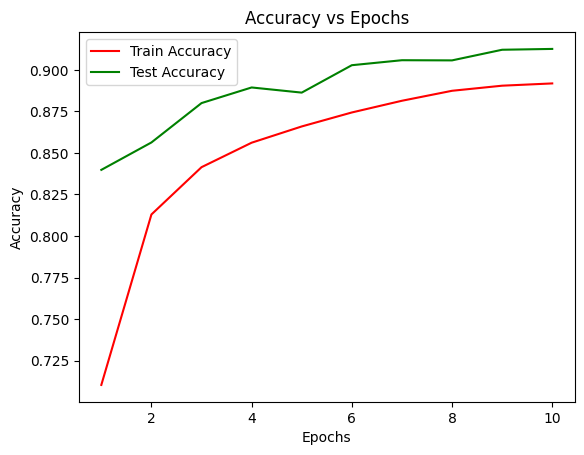

469/469 [==============================] - 4s 8ms/step - loss: 0.7583 - accuracy: 0.9063 - val_loss: 0.6967 - val_accuracy: 0.9195


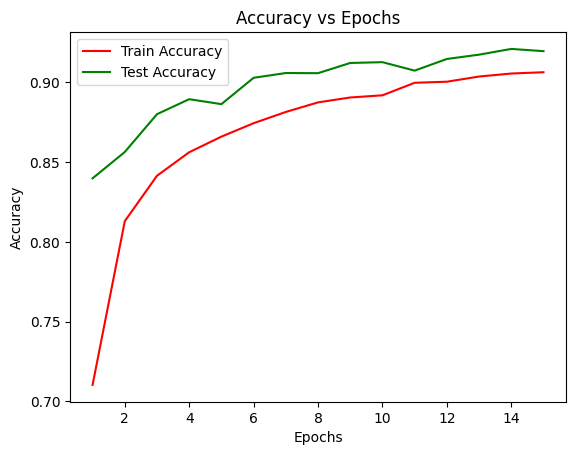

469/469 [==============================] - 4s 8ms/step - loss: 0.7416 - accuracy: 0.9138 - val_loss: 0.6803 - val_accuracy: 0.9257


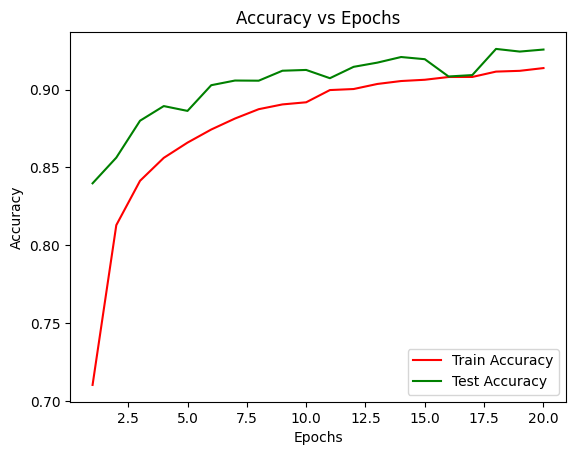

469/469 [==============================] - 4s 8ms/step - loss: 0.7311 - accuracy: 0.9184 - val_loss: 0.6801 - val_accuracy: 0.9279


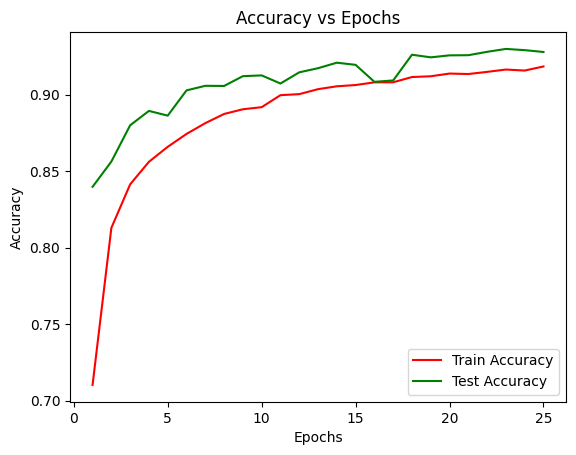

469/469 [==============================] - 4s 8ms/step - loss: 0.7251 - accuracy: 0.9215 - val_loss: 0.6747 - val_accuracy: 0.9283


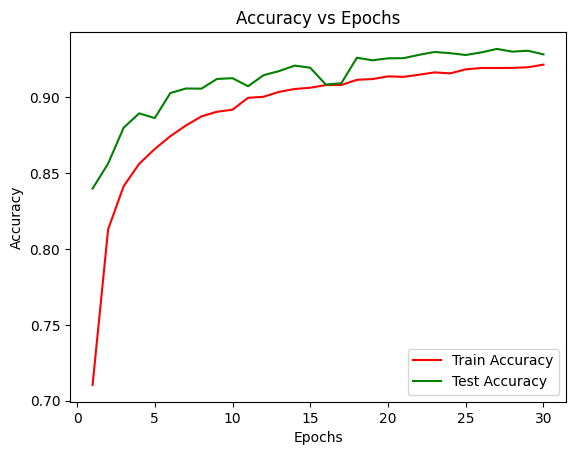

469/469 [==============================] - 4s 8ms/step - loss: 0.7209 - accuracy: 0.9233 - val_loss: 0.6843 - val_accuracy: 0.9236


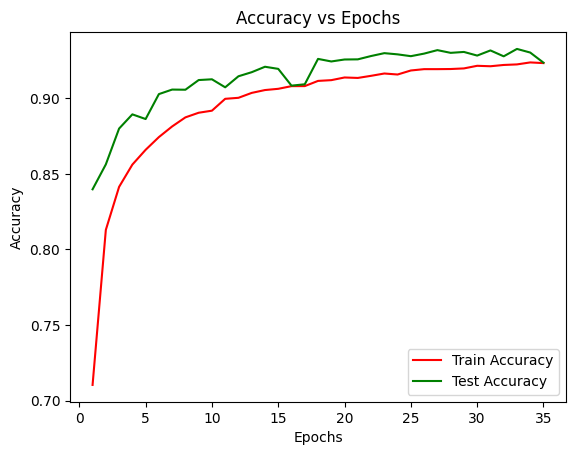

469/469 [==============================] - 4s 8ms/step - loss: 0.7155 - accuracy: 0.9253 - val_loss: 0.6688 - val_accuracy: 0.9324


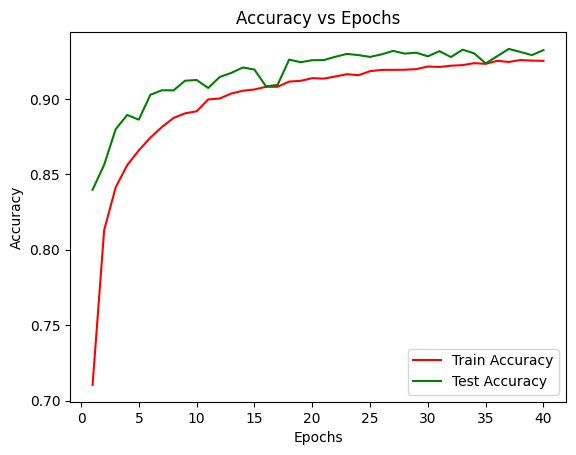

469/469 [==============================] - 4s 8ms/step - loss: 0.7127 - accuracy: 0.9259 - val_loss: 0.6659 - val_accuracy: 0.9343


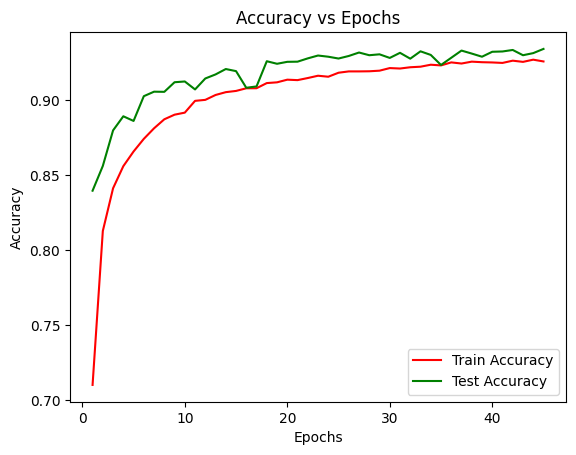

469/469 [==============================] - 4s 8ms/step - loss: 0.7087 - accuracy: 0.9285 - val_loss: 0.6700 - val_accuracy: 0.9309


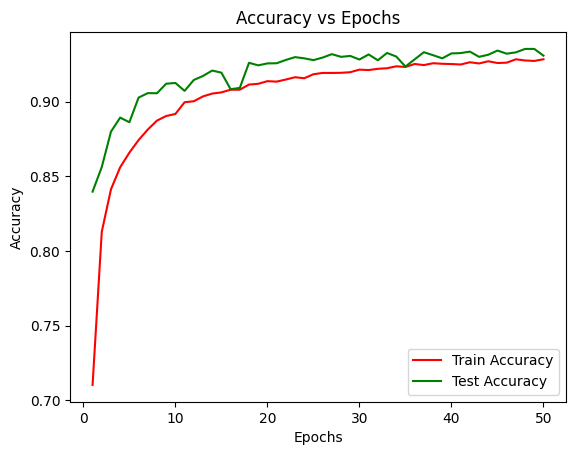

469/469 [==============================] - 4s 8ms/step - loss: 0.7057 - accuracy: 0.9306 - val_loss: 0.6676 - val_accuracy: 0.9323


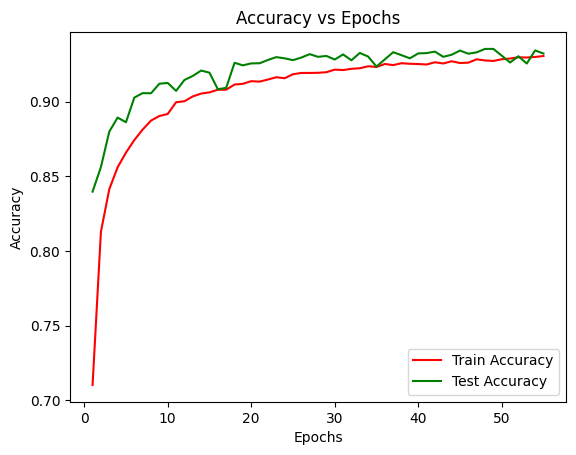

469/469 [==============================] - 4s 8ms/step - loss: 0.7035 - accuracy: 0.9311 - val_loss: 0.6680 - val_accuracy: 0.9337


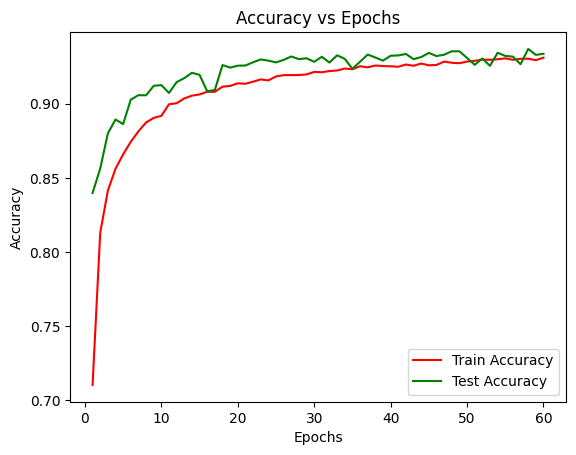

469/469 [==============================] - 4s 8ms/step - loss: 0.7013 - accuracy: 0.9319 - val_loss: 0.6758 - val_accuracy: 0.9259


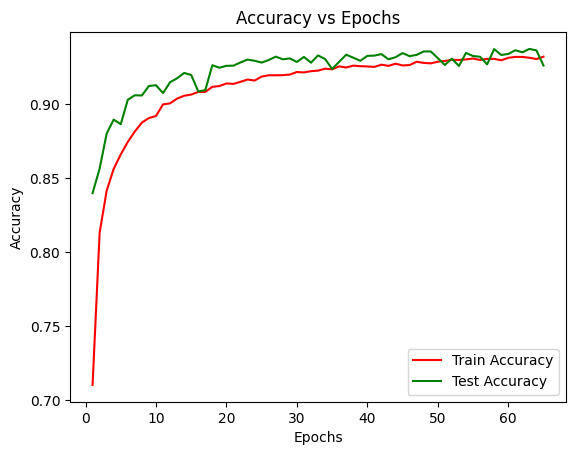

469/469 [==============================] - 4s 8ms/step - loss: 0.6982 - accuracy: 0.9336 - val_loss: 0.6572 - val_accuracy: 0.9371


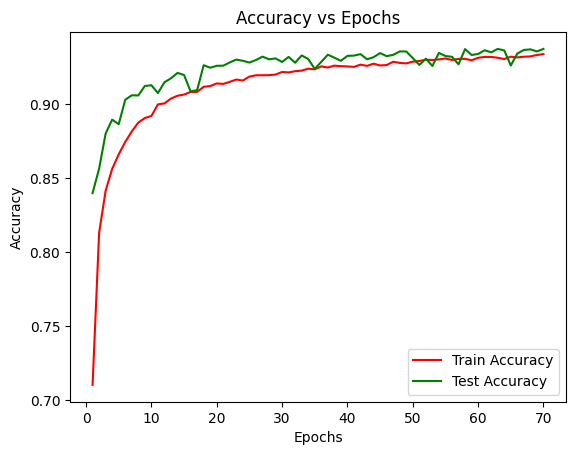

469/469 [==============================] - 4s 8ms/step - loss: 0.6991 - accuracy: 0.9326 - val_loss: 0.6571 - val_accuracy: 0.9353


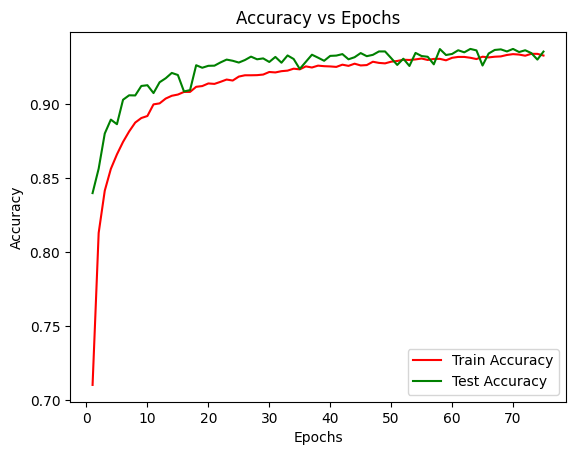

469/469 [==============================] - 4s 8ms/step - loss: 0.6971 - accuracy: 0.9344 - val_loss: 0.6592 - val_accuracy: 0.9379


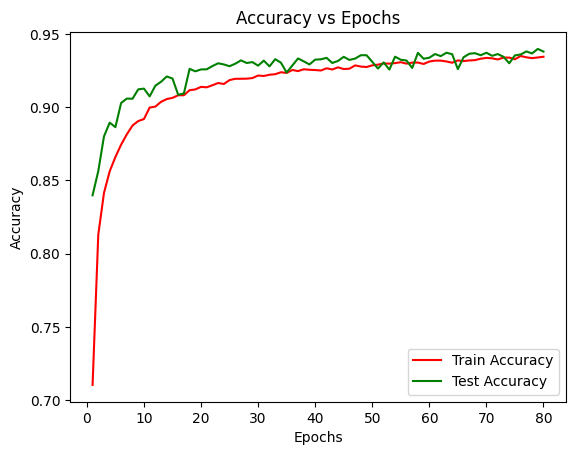

In [12]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=label_smoothing),
              optimizer=opt,
              metrics=['accuracy'])

train_acc_points = []
val_acc_points = []
epochs_list = []

for epoch in range(num_epochs):
    history = model.fit(X_train_images, Y_train_labels,
                        batch_size=batch_size,
                        epochs=1,  
                        verbose=1,
                        validation_data=(X_val_images, Y_val_labels))
    
    train_acc_points.append(history.history['accuracy'])
    val_acc_points.append(history.history['val_accuracy'])
    epochs_list.append(epoch + 1)  

    if (epoch + 1) % 5 == 0:
        plt.plot(epochs_list, train_acc_points, 'r-', label='Train Accuracy')
        plt.plot(epochs_list, val_acc_points, 'g-', label='Test Accuracy')
        plt.xlabel('Epochs') 
        plt.ylabel('Accuracy') 
        plt.title('Accuracy vs Epochs')
        plt.legend()
        plt.show()
